In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# get CC_realtor_merged_cleaned_adjusted.csv
CC = pd.read_csv('../Data/CC_realtor_merged_cleaned_adjusted.csv')

# drop SOLDPRICE, price_multiplier, days_on_market_multiplier, adjusted_dom, lat, long
CC = CC.drop(columns=['SOLDPRICE', 'price_multiplier', 'days_on_market_multiplier', 'adjusted_dom', 'lat', 'long'])
# show head
CC.head()


,ZIP,SQFT,BEDS,BATHS,AGE,DOM,zip_cluster,adjusted_sold_price
0,2474,1368,2,2.0,3,897,2474.0,201925.858031
1,2124,1850,2,2.5,5,658,2124.0,246467.513766
2,2184,1469,2,1.0,38,467,2184.0,218602.614649
3,1949,2945,2,2.5,4,565,1949.0,360729.317692
4,2139,2536,3,2.5,3,56,2139.0,662792.730048


In [8]:
# get the min and the max adjusted_sold_price in the given zip_cluster, and add these as columns to CC
CC['min_adjusted_sold_price'] = CC.groupby('zip_cluster')['adjusted_sold_price'].transform('min')
CC['max_adjusted_sold_price'] = CC.groupby('zip_cluster')['adjusted_sold_price'].transform('max')
# show head
CC.head()


,ZIP,SQFT,BEDS,BATHS,AGE,DOM,zip_cluster,adjusted_sold_price,min_adjusted_sold_price,max_adjusted_sold_price
0,2474,1368,2,2.0,3,897,2474.0,201925.858031,85695.364140,4.501469e+05
1,2124,1850,2,2.5,5,658,2124.0,246467.513766,97984.026880,6.142845e+05
2,2184,1469,2,1.0,38,467,2184.0,218602.614649,131425.741133,3.797477e+05
3,1949,2945,2,2.5,4,565,1949.0,360729.317692,151133.145171,4.745456e+05
4,2139,2536,3,2.5,3,56,2139.0,662792.730048,230651.870057,1.832622e+06


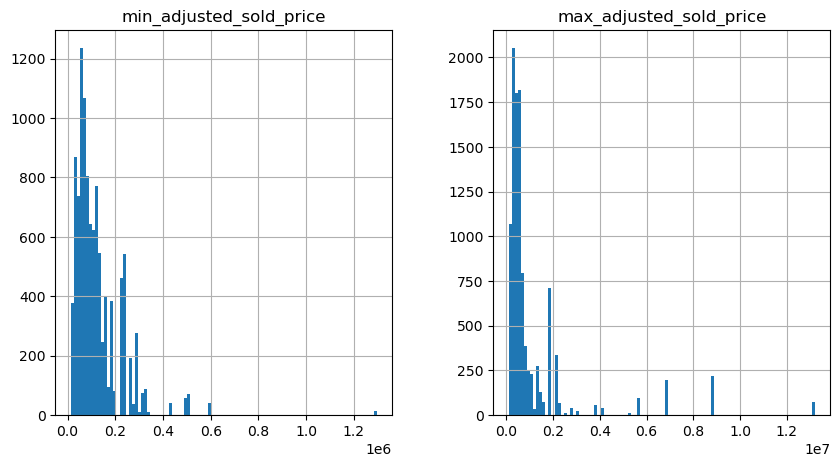

In [10]:
# get a histogram of the min and max adjusted_sold_price in the given zip_cluster
CC[['min_adjusted_sold_price', 'max_adjusted_sold_price']].hist(bins=100, figsize=(10, 5))
plt.show()


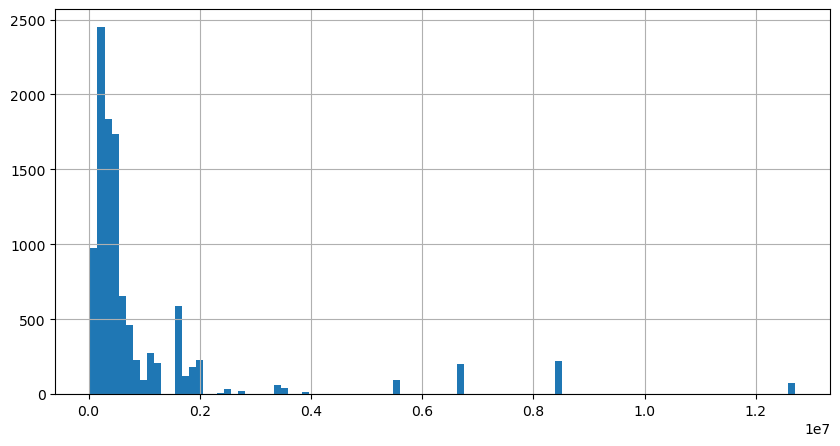

In [12]:
# get a histogram of the max adjusted_sold_price minus the min adjusted_sold_price in the given zip_cluster
(CC['max_adjusted_sold_price'] - CC['min_adjusted_sold_price']).hist(bins=100, figsize=(10, 5))
plt.show()


In [14]:
# add a column to CC that is the max adjusted_sold_price minus the min adjusted_sold_price in the given zip_cluster
CC['price_range'] = CC['max_adjusted_sold_price'] - CC['min_adjusted_sold_price']
# show head
CC.head()


,ZIP,SQFT,BEDS,BATHS,AGE,DOM,zip_cluster,adjusted_sold_price,min_adjusted_sold_price,max_adjusted_sold_price,price_range
0,2474,1368,2,2.0,3,897,2474.0,201925.858031,85695.364140,4.501469e+05,3.644515e+05
1,2124,1850,2,2.5,5,658,2124.0,246467.513766,97984.026880,6.142845e+05,5.163004e+05
2,2184,1469,2,1.0,38,467,2184.0,218602.614649,131425.741133,3.797477e+05,2.483220e+05
3,1949,2945,2,2.5,4,565,1949.0,360729.317692,151133.145171,4.745456e+05,3.234125e+05
4,2139,2536,3,2.5,3,56,2139.0,662792.730048,230651.870057,1.832622e+06,1.601970e+06


In [15]:
# get the min and max of the price_range column
print(f"Min: {CC['price_range'].min()}")
print(f"Max: {CC['price_range'].max()}")


Min: 34304.03554824633
Max: 12702321.595251886


In [20]:
# Calculate the count of rows in each zip_cluster and add this to CC
CC['count'] = CC['zip_cluster'].map(CC['zip_cluster'].value_counts())

# Show head
CC.head()

,ZIP,SQFT,BEDS,BATHS,AGE,DOM,zip_cluster,adjusted_sold_price,min_adjusted_sold_price,max_adjusted_sold_price,price_range,count
0,2474,1368,2,2.0,3,897,2474.0,201925.858031,85695.364140,4.501469e+05,3.644515e+05,81.0
1,2124,1850,2,2.5,5,658,2124.0,246467.513766,97984.026880,6.142845e+05,5.163004e+05,62.0
2,2184,1469,2,1.0,38,467,2184.0,218602.614649,131425.741133,3.797477e+05,2.483220e+05,60.0
3,1949,2945,2,2.5,4,565,1949.0,360729.317692,151133.145171,4.745456e+05,3.234125e+05,39.0
4,2139,2536,3,2.5,3,56,2139.0,662792.730048,230651.870057,1.832622e+06,1.601970e+06,132.0


In [21]:
# make columns for 1st and 3rd quartile of the adjusted sold price in the given zip cluster
CC[]

Sum of count column: 992693.0
Number of rows: 10799


In [5]:
# get realtor_zip_monthly_historical.csv
realtor = pd.read_csv('../Data/realtor/realtor_zip_monthly_historical.csv')

# show head
realtor.head()

/var/folders/sp/_mjrzq3j7cx5cnmtdrl_njsr0000gn/T/ipykernel_61544/2484082517.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  realtor = pd.read_csv('../Data/realtor/realtor_zip_monthly_historical.csv')


,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202408,32343.0,"midway, fl",304950.0,0.0168,-0.1028,14.0,-0.2632,-0.1250,74.0,...,316505.0,0.0254,-0.0129,20.0,0.0526,0.2500,0.3571,0.3045,NaN,1.0
1,202408,62896.0,"west frankfort, il",125000.0,0.3999,0.6955,29.0,0.0943,-0.0333,62.0,...,128365.0,0.1748,0.4221,47.0,-0.0309,-0.0874,0.6552,-0.1939,-0.0615,1.0
2,202408,56477.0,"sebeka, mn",302400.0,-0.1186,-0.1919,13.0,0.6250,-0.1875,51.0,...,290570.0,0.0048,-0.1862,17.0,0.7000,-0.1500,0.4615,0.2115,0.2115,1.0
3,202408,25315.0,"charleston, wv",65000.0,-0.1613,0.1017,5.0,0.2500,-0.2308,36.0,...,100600.0,0.1795,0.7891,6.0,-0.2941,-0.3333,0.4000,-0.8500,0.0154,0.0
4,202408,76454.0,"gorman, tx",184500.0,-0.0027,0.1535,3.0,-0.5000,-0.4545,46.0,...,489750.0,0.3737,0.0619,8.0,-0.0588,-0.0588,1.3333,0.8333,0.7879,1.0


In [7]:
# remove all rows where zip_name doesn't end in "ma" and isn't nan
realtor = realtor[realtor['zip_name'].str.endswith('ma') | realtor['zip_name'].isna()]

# show head
realtor.head()

,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
68,202408,2330.0,"carver, ma",684999.0,-0.0028,0.1687,11.0,-0.0833,0.0000,63.0,...,664423.0,0.0135,0.1505,18.0,0.0909,0.2000,0.4545,0.0795,0.1364,0.0
308,202408,2332.0,"duxbury, ma",1669500.0,0.0771,0.0600,21.0,-0.0870,-0.3333,44.0,...,4492668.0,0.6184,0.8299,26.0,-0.1875,-0.2778,0.2381,-0.1097,0.1270,0.0
316,202408,1013.0,"chicopee, ma",312000.0,-0.0407,0.0852,7.0,-0.4167,0.0000,9.0,...,318898.0,-0.0024,0.1980,12.0,-0.2258,0.2000,0.7143,0.4643,0.3571,0.0
320,202408,1983.0,"topsfield, ma",949950.0,-0.0318,-0.0316,10.0,-0.0909,0.1765,63.0,...,1382904.0,-0.0252,0.0199,13.0,-0.1333,0.4444,0.3000,0.0273,0.1824,0.0
322,202408,2199.0,"boston, ma",2992500.0,0.0008,-0.2443,8.0,0.1429,-0.4286,68.0,...,9920250.0,0.6727,0.2624,8.0,0.1429,-0.4483,NaN,NaN,NaN,1.0
